# Gradient Boosting Decision Tree

Preksha

In [35]:
import pandas as pd
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [36]:
df = pd.read_csv('loan_approval_dataset.csv')
df.head()
df.columns = df.columns.str.strip()

In [49]:
#standardize and one hot encode
train,test = train_test_split(df, train_size=0.8)

X_train = train.drop('loan_status', axis=1)
y_train = train['loan_status']

# Numeric vs categorical
X_train_num = X_train.select_dtypes(include='number')
X_train_cat = X_train.select_dtypes(exclude='number')


# # Scale numeric
# from sklearn.preprocessing import StandardScaler
# stnd = StandardScaler().set_output(transform='pandas')
# X_train_num = stnd.fit_transform(X_train_num)

X_train_cat = pd.get_dummies(X_train_cat, drop_first=False)

X_train = pd.concat([X_train_num, X_train_cat], axis=1)

X_train.head(3)

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,education_ Graduate,education_ Not Graduate,self_employed_ No,self_employed_ Yes
3084,3085,4,9700000,19400000,20,798,6400000,13700000,20300000,12800000,True,False,True,False
759,760,2,9700000,19900000,16,395,2800000,13700000,37000000,10800000,True,False,True,False
963,964,0,5000000,14400000,4,874,3000000,9300000,14100000,3900000,True,False,True,False


In [46]:
# standardize the test set
X_test = test.drop('loan_status', axis=1)
y_test = test.loan_status

X_test_num = X_test.select_dtypes(include='number')
X_test_cat = X_test.select_dtypes(exclude='number')

X_test_cat = pd.get_dummies(X_test_cat, drop_first=False)

# X_test_num = stnd.transform(X_test_num)

X_test = pd.concat([X_test_num, X_test_cat], axis=1)

In [47]:
# Train Gradient Boosting model
model = GradientBoostingClassifier()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

model.score(X_test, y_test)

0.968384074941452

Is there a particular prediction they are missing?

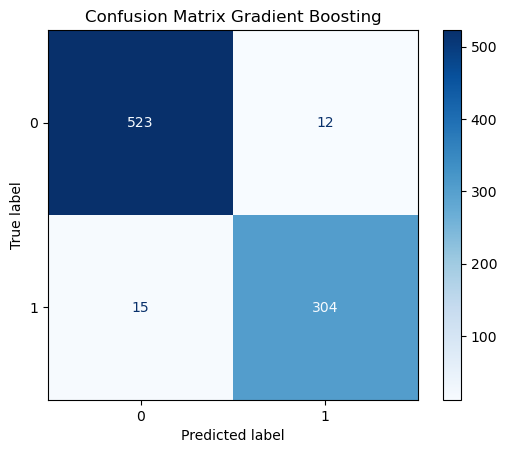

In [48]:
cm= confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix Gradient Boosting")
plt.show()

Not a niche failure -- the FP and FN are about equal

QUESTION: Should we be stratifying the targets? THe 1/1 and 0/0 squares are not euqual in numbers. But summary statsitics led me to believe that we didn't need to stratify